# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from types import SimpleNamespace
from scipy import optimize
from scipy.optimize import minimize_scalar

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
from inauguralproject import EdgeworthBoxClass 
from inauguralproject import ErrorMarketClass
from inauguralproject import MarketClearPriceClass
from inauguralproject import OptimizationWithNoUpperBound
from inauguralproject import AgentOptimization
from inauguralproject import AgentOptimization2
from inauguralproject import UtilitarianSocialPlanner
from inauguralproject import UtilitarianSocialPlannerEdgeworthBox
from inauguralproject import TotalEndowments 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

# Question 1

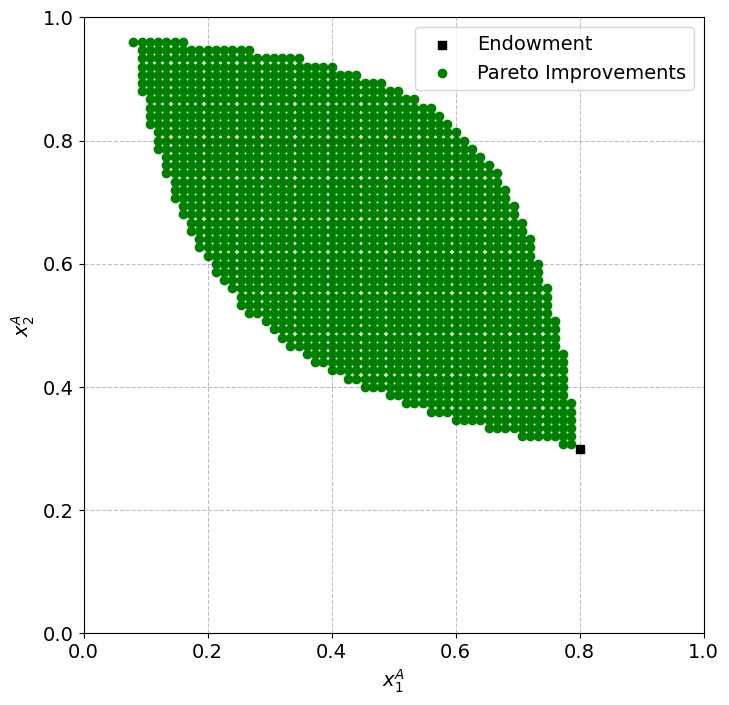

In [2]:
# The code for solving the model is in the class below
alpha = 1/3
beta = 2/3
endowment_A = [0.8, 0.3]

box = EdgeworthBoxClass(alpha, beta, endowment_A)

# The Edgeworth box with Pareto improvements for the set C
box.plot_edgeworth_box()

# Question 2

Explain your code and procedure

In [3]:
# We create a variable for the class
errormarket = ErrorMarketClass()

# We solve the 
result = errormarket.check_market_clearing()

# We rint the errors in the market clearing condition
print("Errors in the market clearing condition:")
for eps1, eps2 in result:
    print(f"Error 1: {eps1}, Error 2: {eps2}")


Errors in the market clearing condition:
Error 1: 0.53, Error 2: -0.27
Error 1: 0.48, Error 2: -0.25
Error 1: 0.42, Error 2: -0.23
Error 1: 0.38, Error 2: -0.22
Error 1: 0.33, Error 2: -0.2
Error 1: 0.29, Error 2: -0.19
Error 1: 0.26, Error 2: -0.17
Error 1: 0.23, Error 2: -0.15
Error 1: 0.19, Error 2: -0.14
Error 1: 0.17, Error 2: -0.12
Error 1: 0.14, Error 2: -0.11
Error 1: 0.11, Error 2: -0.09
Error 1: 0.09, Error 2: -0.07
Error 1: 0.07, Error 2: -0.06
Error 1: 0.05, Error 2: -0.04
Error 1: 0.03, Error 2: -0.03
Error 1: 0.01, Error 2: -0.01
Error 1: -0.01, Error 2: 0.01
Error 1: -0.02, Error 2: 0.02
Error 1: -0.04, Error 2: 0.04
Error 1: -0.05, Error 2: 0.05
Error 1: -0.07, Error 2: 0.07
Error 1: -0.08, Error 2: 0.09
Error 1: -0.09, Error 2: 0.1
Error 1: -0.1, Error 2: 0.12
Error 1: -0.11, Error 2: 0.13
Error 1: -0.13, Error 2: 0.15
Error 1: -0.14, Error 2: 0.17
Error 1: -0.15, Error 2: 0.18
Error 1: -0.15, Error 2: 0.2
Error 1: -0.16, Error 2: 0.21
Error 1: -0.17, Error 2: 0.23
Err

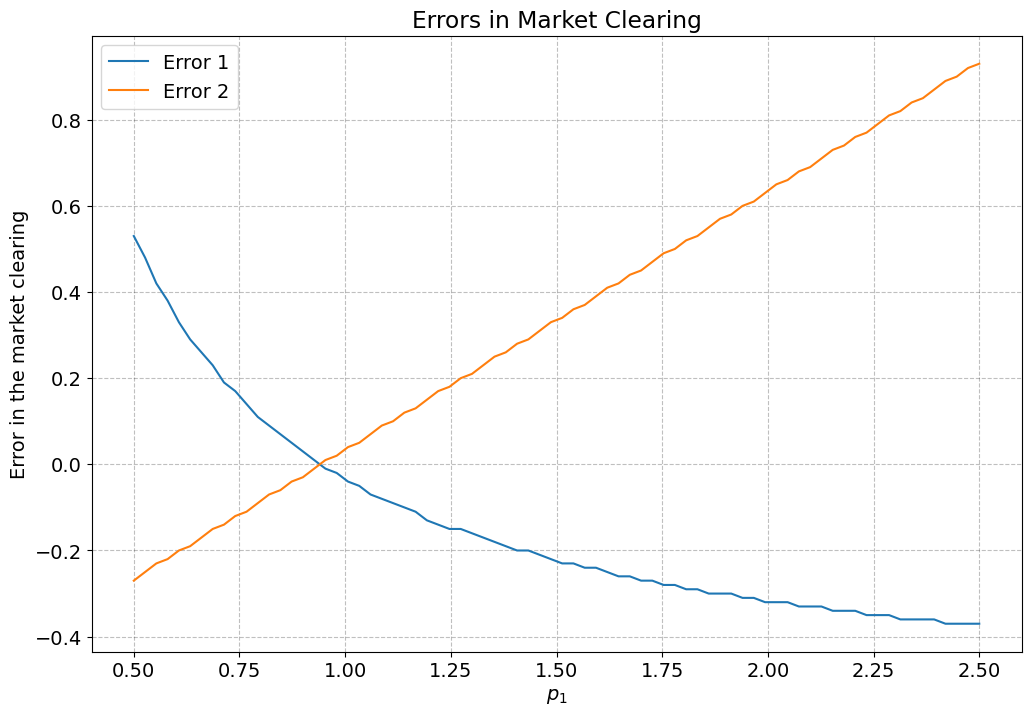

In [4]:

#List to store errors
error1 = []
error2 = []

# Iterate over the result and append errors
for eps1, eps2 in result:
 error1.append(eps1)
 error2.append(eps2)

# Plotting errors
plt.figure(figsize=(12, 8))
plt.plot(errormarket.rho1, error1, label='Error 1')
plt.plot(errormarket.rho1, error2, label='Error 2')
plt.xlabel('$p_1$')
plt.ylabel('Error in the market clearing')
plt.title('Errors in Market Clearing')
plt.grid(True)
plt.legend()
# Show plot
plt.show()



# Question 3

In [5]:
# Create an instance of the class with given parameters
alpha = 1/3
beta = 2/3
endowment_A = [0.8, 0.3]

box = EdgeworthBoxClass(alpha, beta, endowment_A)

# Market clearing price
p1_clear = box.market_clearing_price()
print(f'The market clearing price for good 1 is given by: {p1_clear:.3f}')

The market clearing price for good 1 is given by: 0.944


# Question 4a

In [6]:
model = ErrorMarketClass()

N = 75
rho1= [0.5 + 2 * i / N for i in range(N + 1)]

max_utility_A = float('-inf')
optimal_price_A = None

# Iterate over possible prices
for p1 in rho1:
    # Check if price is positive
    if p1 > 0:
        xB1, xB2 = model.demand_B(p1)
        if 1 - xB1 > 0 and 1 - xB2 > 0:
            utility_A = model.utility_A(1 - xB1, 1 - xB2)
            if utility_A > max_utility_A:
                max_utility_A = utility_A
                optimal_price_A = p1

# If optimal price is found, proceed with calculations
if optimal_price_A is not None:
    # Calculate the demand for consumer B using the optimal price for consumer A
    optimal_xB1, optimal_xB2 = model.demand_B(optimal_price_A)

    # Calculate the demand for consumer A using the optimal price to find the optimal allocation
    optimal_xA1, optimal_xA2 = model.demand_A(optimal_price_A)

    allocation_A1 = (1 - model.demand_B(optimal_price_A)[0])
    allocation_A2 = (1-model.demand_B(optimal_price_A)[1])

    # Calculate the utility for consumer B
    utility_B = model.utility_B(optimal_xB1, optimal_xB2)

    print(f"Optimal price for consumer A: {optimal_price_A:.4f}")
    print(f"Allocation for consumer A: x1A = {allocation_A1:.3f}, x2A = {allocation_A2:.4f}")
    print(f"Utility for consumer A: {max_utility_A:.4f}")
    print(f"Utility for consumer B: {utility_B:.4f}")


Optimal price for consumer A: 1.8867
Allocation for consumer A: x1A = 0.619, x2A = 0.6409
Utility for consumer A: 0.6336
Utility for consumer B: 0.3734


# Question 4b

In [16]:

# Define the negative utility function to maximize
def negative_utility_A(p1):
    if p1 <= 0:
        return float('inf')  # Return positive infinity to avoid p1 being zero
    # Calculate the negative utility
    return -model.utility_A(1 - model.demand_B(p1)[0], 1 - model.demand_B(p1)[1])

# Set bounds for the optimization
bounds = (1e-6, 10)  # Minimum bound for p1 is 1e-6

# Find the minimum of the negative utility function within the specified bounds
result = minimize_scalar(negative_utility_A, bounds=bounds)


# Check if optimization was successful
if result.success:
    max_utility_A_4b = -result.fun  # Since we minimized negative utility, maximum utility is -result.fun
    optimal_p1 = result.x
else:
    print("Optimization failed:", result.message)


x1A = (1-model.demand_B(optimal_p1)[0])
x2A = (1-model.demand_B(optimal_p1)[1])

utility_B_4b = model.utility_B(1-x1A, 1-x2A)


print(f"Optimal price for consumer A: {optimal_p1:.4f}")
print(f"Allocation for consumer A: x1A = {x1A:.3f}, x2A = {x2A:.4f}")
print(f"Utility for consumer A: {max_utility_A_4b:.4f}")
print(f"Utility for consumer B: {utility_B_4b:.4f}")



Optimal price for consumer A: 1.8993
Allocation for consumer A: x1A = 0.621, x2A = 0.6400
Utility for consumer A: 0.6336
Utility for consumer B: 0.3726


# Question 5a

Defining a solver in `Question5a.py`



Find the allocation if the choice set is restricted to C



In [8]:

# Initial guess for x_A1 and x_A2
x0 = [0.5, 0.5]  # The initial guess for x_A1 and x_A2, which should be a feasible guess
alpha = 1/3  # The example value for alpha

# Define the bounds for x_A1 and x_A2
bounds = [(0, 1), (0, 1)]

# Create an instance of AgentOptimization
agent_opt = AgentOptimization(0.8, 0.3, x0, alpha, bounds)

# We solve the problem
optimal_allocation, optimal_utility = agent_opt.solve()

# We print the optimal solution
print("Optimal Allocation for Agent A:", optimal_allocation) # find the allocation

Optimal Allocation for Agent A: [0.41601676 0.41601676]


# Question 5b

In [9]:


x0 = [0.5, 0.5]  # Initial guess for x_A1 and x_A2
alpha = 1/3  # Example value for alpha

# Create an instance of AgentOptimization and solve the problem
agent_opt = AgentOptimization2(x0, alpha)
optimal_allocation, optimal_utility = agent_opt.solve()

# Print the optimal solution
print("Optimal Allocation for Agent A:", optimal_allocation)

Optimal Allocation for Agent A: [1. 1.]


# Question 6a

In [10]:


# 1. We create instance of UtilitarianSocialPlanner
utilitarian_planner = UtilitarianSocialPlanner()

# 2. We set the parameters
alpha = 0.5
utilitarian_planner.parameters(alpha)

# 3. We define the bounds for the endowments
bounds = [(0, 1), (0, 1)]

# 4. We call the aggregate_utility_functions 
def aggregate_utility_functions(x):
    return utilitarian_planner.aggregate_utility_functions(x)

# 5. We call the optimization function from the scipy
utilitarian_social_planner_solution = optimize.minimize(aggregate_utility_functions, x0=[0.5, 0.5], method='SLSQP', bounds=bounds)

# 6. We print the result
if utilitarian_social_planner_solution.success:
    xA1_optimal, xA2_optimal = utilitarian_social_planner_solution.x
    xB1_optimal = 1 - xA1_optimal
    xB2_optimal = 1 - xA2_optimal
    print("The optimal allocation for the utilitarian social planner is the following:")
    print(f"((xA1_optimal,xA2_optimal),(xB1_optimal,xB2_optimal)) = (({xA1_optimal}, {xA2_optimal}), ({xB1_optimal}, {xB2_optimal}))")
else:
    print("The optimal allocation for the utilitarian social planner was not found")

The optimal allocation for the utilitarian social planner is the following:
((xA1_optimal,xA2_optimal),(xB1_optimal,xB2_optimal)) = ((0.41475624515662524, 0.5863770555786761), (0.5852437548433748, 0.41362294442132386))


# Question 6b

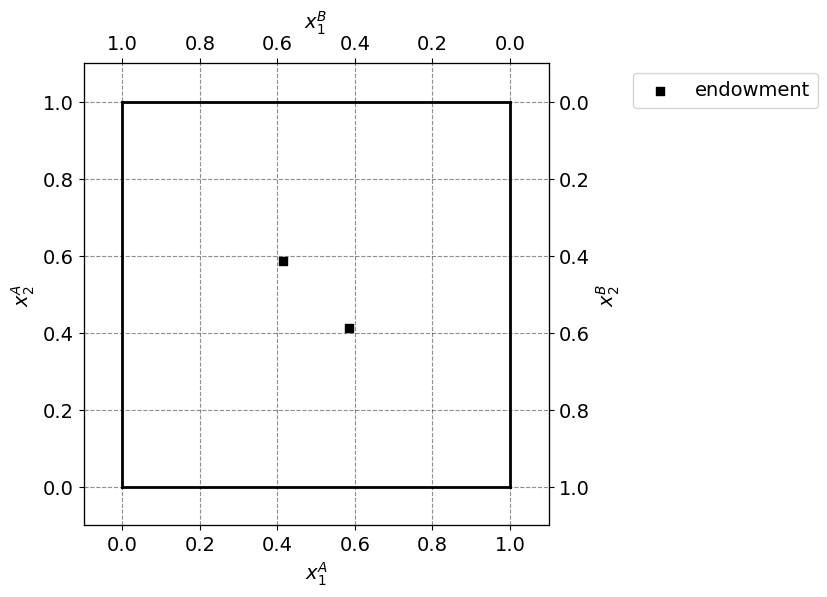

In [11]:
# We import the class


# We plot the Edgeworth box
edgeworth_box = UtilitarianSocialPlannerEdgeworthBox()
edgeworth_box.plot_edgeworth_box(xA1_optimal, xA2_optimal, xB1_optimal, xB2_optimal)

Maximizing total welfare will be socially benefinicial from the view of a social planner rather than only maximizing the utility of consumer A. However, this will reduce the utility for this consumer, making him more worse off than in question 4.

# Question 7

In [12]:

# We set the number of elements
n=50

# We generate random endowments
wA1 = np.random.uniform(0, 1, n)
wA2 = np.random.uniform(0, 1, n)

# We plot the figure
total_endowments = TotalEndowments(seed=69, n=50)
total_endowments.plot_endowments(wA1, wA2)

TypeError: EdgeworthBoxClass.pareto_improvements() missing 1 required positional argument: 'self'

# Question 8


The prices for good 1 are the following: [0.5        0.54081633 0.58163265 0.62244898 0.66326531 0.70408163
 0.74489796 0.78571429 0.82653061 0.86734694 0.90816327 0.94897959
 0.98979592 1.03061224 1.07142857 1.1122449  1.15306122 1.19387755
 1.23469388 1.2755102  1.31632653 1.35714286 1.39795918 1.43877551
 1.47959184 1.52040816 1.56122449 1.60204082 1.64285714 1.68367347
 1.7244898  1.76530612 1.80612245 1.84693878 1.8877551  1.92857143
 1.96938776 2.01020408 2.05102041 2.09183673 2.13265306 2.17346939
 2.21428571 2.25510204 2.29591837 2.33673469 2.37755102 2.41836735
 2.45918367 2.5       ]
The optimal allocations are the following: [[[0.77123646 0.72245233 0.68051509 ... 0.25848847 0.25627035 0.25412466]
  [0.77123646 0.78142803 0.79161959 ... 1.25024015 1.26043172 1.27062328]]

 [[0.83365998 0.79465959 0.76113294 ... 0.42374445 0.42197118 0.42025581]
  [0.83365998 0.85952976 0.88539954 ... 2.04953951 2.07540928 2.10127906]]

 [[0.87033061 0.82306022 0.78242427 ... 0.37349291 0.371

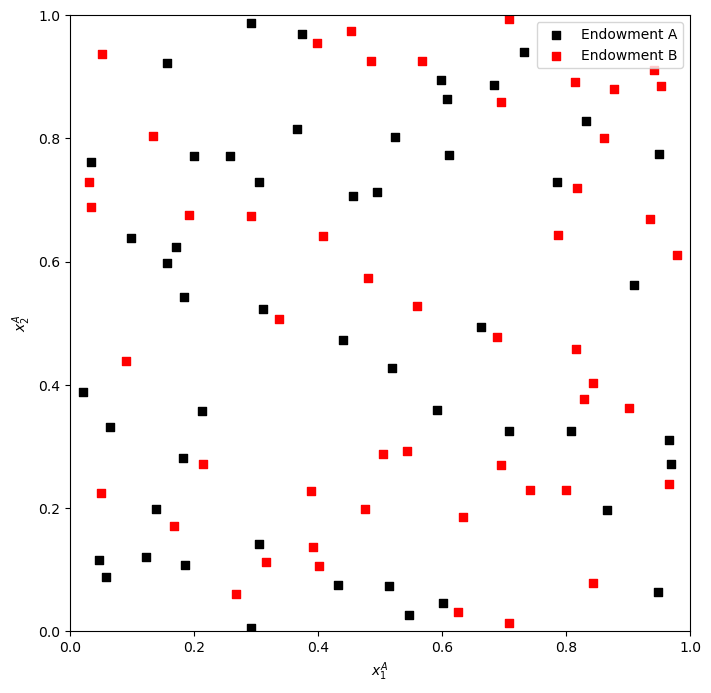

In [ ]:


# We generate random set W with 50 elements
np.random.seed(42)
n = 50
omega_A1 = np.random.uniform(0, 1, n)
omega_A2 = np.random.uniform(0, 1, n)
p1 = np.linspace(0.5, 2.5, n)
omega_B1 = 1-omega_A1
omega_B2 = 1-omega_A2

# We create a function Function to calculate optimal allocation for given omega_A1 and omega_A2
def set_of_optimal_allocations(omega_A1, omega_A2, alpha=1/3, p2=1):
    xA1 = alpha * (p1 * omega_A1 + p2 * omega_A2) / p1
    xA2 = (1 - alpha) * (p1 * omega_A1 + p2 * omega_A2) / p2
    return xA1, xA2

# We use a list iteration in order to calculate the optimal allocations for each omega in the total endowments set, W
allocations = np.array([set_of_optimal_allocations(omega_A1, omega_A2) for omega_A1, omega_A2 in zip(omega_A1, omega_A2)])

print("The prices for good 1 are the following:", p1)
print("The optimal allocations are the following:", allocations)

# Plot the Edgeworth box with Pareto improvements
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlabel("$x_1^A$") # setting x-axis label
ax.set_ylabel("$x_2^A$") # setting y-axis label
# Setting the limits
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Plotting endowment points
ax.scatter(omega_A1, omega_A2, marker='s', color='black', label='Endowment A')
ax.scatter(omega_B1, omega_B2, marker='s', color='red', label='Endowment B')

ax.legend() # We add legend
plt.show() # We display the plot
